# Rationality vs. emotionality in political communication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from tqdm import tqdm
from datetime import datetime,timedelta
from scipy import stats
tqdm.pandas(desc='Cleaning')

from scorers.cleaning import *
from scorers.rationality_vs_emotionality import *

In [2]:
# Manifestos
manifestos = pd.read_csv('../manifesto-forewords/manifestos.csv')
manifestos.year = pd.to_datetime(manifestos.year)
manifestos = manifestos[manifestos.year>='1945-01-01']
# PMQs answers
pmqs = pd.read_csv('../hansard-pmqs/hansard_pmqs.csv')
pmqs.date = pd.to_datetime(pmqs.date)
pmqs = pmqs[pmqs.date>='1945-01-01']
pmqs = pd.DataFrame({'date':pmqs.groupby(by='date').answer_text.aggregate(lambda x: ''.join(x)).index,
                     'answer_text':pmqs.groupby(by='date').answer_text.aggregate(lambda x: ''.join(x)),
                     'answerer_party':pmqs.groupby(by='date').answerer_party.aggregate(lambda x: x.mode()),
                     'answerer_name':pmqs.groupby(by='date').answerer_name.aggregate(lambda x: x.mode())})
# Conference speeches
conferences = pd.read_csv('../conference-speeches/conference.csv')
conferences = conferences.drop('Unnamed: 0', axis=1)
conferences.year = conferences.year.apply(lambda year: pd.to_datetime(str(year)+'-01-01'))
conferences = conferences[conferences.year>='1945-01-01']

In [3]:
# Manifestos
manifestos['clean'] = manifestos.foreword.progress_apply(lambda x: clean(x)) # ...clean them
manifestos_nans = [idx for idx,foreword in enumerate(manifestos['clean']) if len(foreword)==0] # ...save NAN indexes to a list
manifestos_scores = [measure_emotionality(text_list=row.clean, raw_text=row.foreword) for idx,row in tqdm(manifestos.iterrows(),desc='Scoring manifesto forewords') if len(row.clean)>0] # ...score them
manifestos_vecs = [list(score_dict.values()) for score_dict in tqdm(manifestos_scores,desc='Saving manifesto scores')] # ...save scores as a list
# # PMQs answers
pmqs['clean'] = pmqs.answer_text.progress_apply(lambda x: clean(x))
pmqs_nans = [idx for idx,answer in enumerate(pmqs['clean']) if len(answer)==0]
pmqs_scores = [measure_emotionality(text_list=row.clean, raw_text=row.answer_text) for idx,row in tqdm(pmqs.iterrows(),desc='Scoring PMQs answers') if len(row.clean)>0]
pmqs_vecs = [list(score_dict.values()) for score_dict in tqdm(pmqs_scores,desc='Saving PMQs answer scores')]
# # Conference speeches
conferences['clean'] = conferences.content.progress_apply(lambda x: clean(x))
conferences_nans = [idx for idx,speech in enumerate(conferences['clean']) if len(speech)==0]
conferences_scores = [measure_emotionality(text_list=row.clean, raw_text=row.content) for idx,row in tqdm(conferences.iterrows(),desc='Scoring conference speeches') if len(row.clean)>0]
conferences_vecs = [list(score_dict.values()) for score_dict in tqdm(conferences_scores,desc='Saving conference speech scores')]

Cleaning: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 76/76 [00:00<00:00, 5422.59it/s]
Scoring manifesto forewords: 76it [00:09,  8.39it/s]
Cleaning: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1806/1806 [00:00<00:00, 2121.64it/s]
Scoring PMQs answers: 1806it [09:24,  3.20it/s]
Cleaning: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:00<00:00, 811.86it/s]
Scoring conference speeches: 183it [02:47,  1.09it/s]
Saving conference speech scores: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:00<?, ?it/s]



 Avg_Arousal_Glasgow
	 Manifestos
1945-64 vs. 1964-79:	Change: - ; T-stat: 2.99**; P-value: 0.0054
1964-79 vs. 1979-97:	Change: + ; T-stat: -1.44; P-value: 0.1606
1979-97 vs. 1997-now:	Change: + ; T-stat: -1.53; P-value: 0.1326
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -1.55; P-value: 0.1220
1964-79 vs. 1979-97:	Change: + ; T-stat: -16.91***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -0.48; P-value: 0.6314
	 Conferences
1945-64 vs. 1964-79:	Change: - ; T-stat: 3.15**; P-value: 0.0026
1964-79 vs. 1979-97:	Change: + ; T-stat: -7.51***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -2.73**; P-value: 0.0072


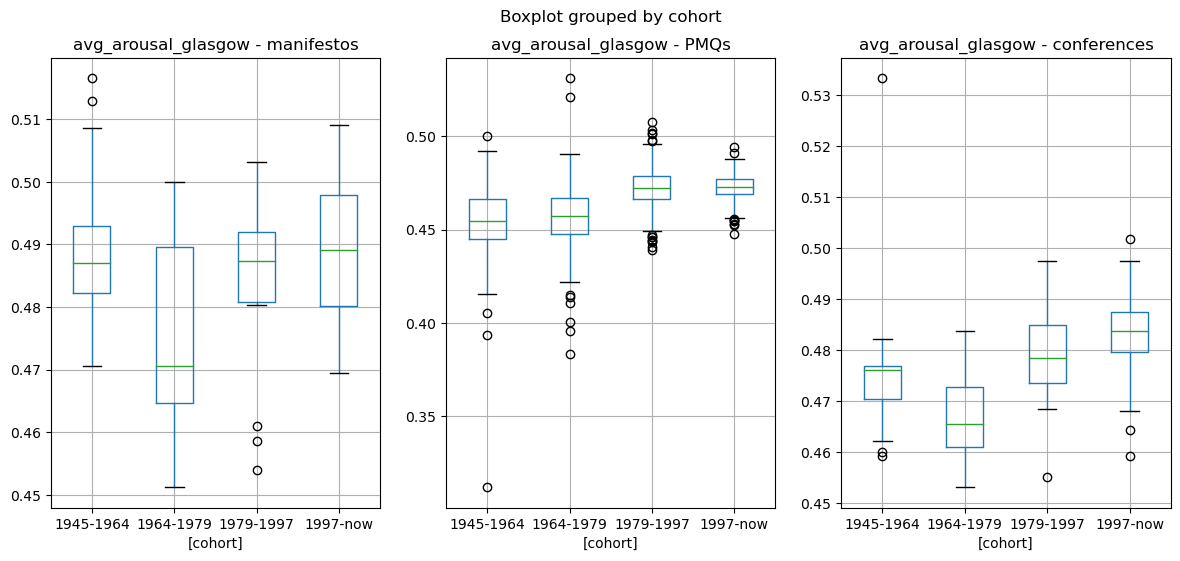


 Avg_Arousal_Warriner
	 Manifestos
1945-64 vs. 1964-79:	Change: - ; T-stat: 3.47**; P-value: 0.0015
1964-79 vs. 1979-97:	Change: + ; T-stat: -1.40; P-value: 0.1738
1979-97 vs. 1997-now:	Change: + ; T-stat: -0.65; P-value: 0.5164
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -2.60**; P-value: 0.0099
1964-79 vs. 1979-97:	Change: + ; T-stat: -8.04***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -10.88***; P-value: 0.0000
	 Conferences
1945-64 vs. 1964-79:	Change: + ; T-stat: -3.27**; P-value: 0.0018
1964-79 vs. 1979-97:	Change: + ; T-stat: -5.54***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -1.01; P-value: 0.3146


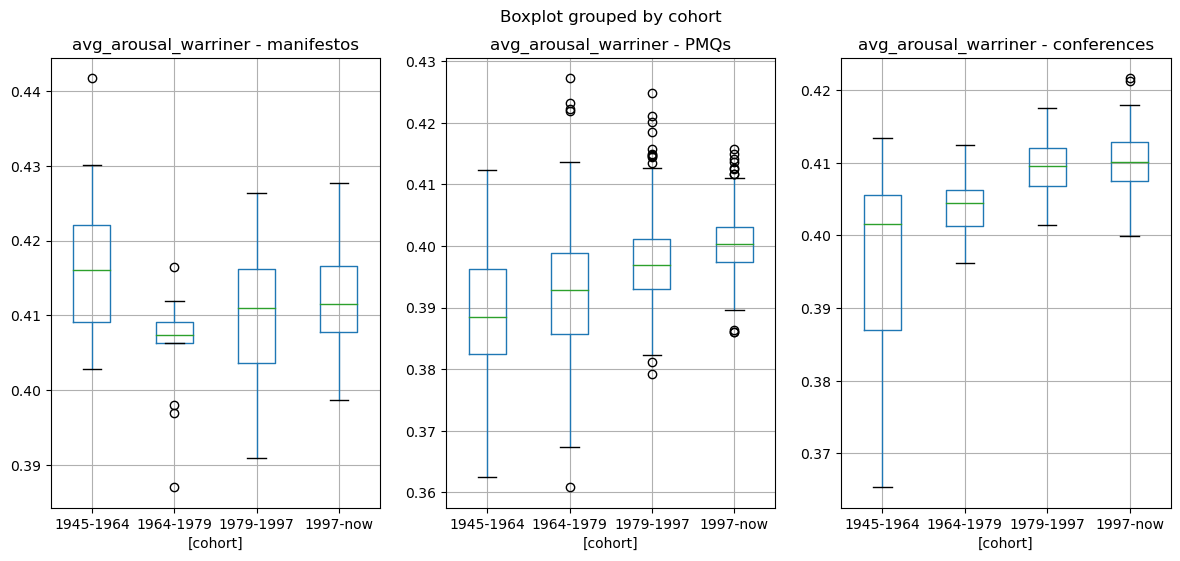


 Avg_Valence_Glasgow
	 Manifestos
1945-64 vs. 1964-79:	Change: - ; T-stat: 3.05**; P-value: 0.0046
1964-79 vs. 1979-97:	Change: + ; T-stat: -2.04; P-value: 0.0510
1979-97 vs. 1997-now:	Change: - ; T-stat: 0.69; P-value: 0.4956
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -2.32*; P-value: 0.0213
1964-79 vs. 1979-97:	Change: + ; T-stat: -13.96***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -3.12**; P-value: 0.0019
	 Conferences
1945-64 vs. 1964-79:	Change: - ; T-stat: 0.32; P-value: 0.7533
1964-79 vs. 1979-97:	Change: + ; T-stat: -7.18***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -1.24; P-value: 0.2168


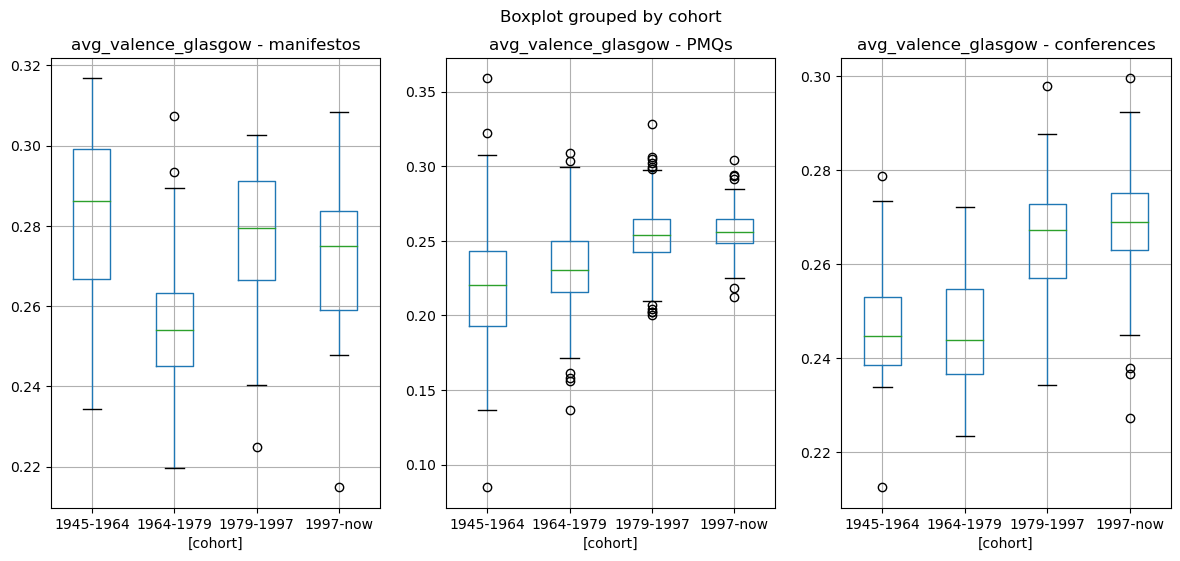


 Avg_Valence_Warriner
	 Manifestos
1945-64 vs. 1964-79:	Change: - ; T-stat: 4.19***; P-value: 0.0002
1964-79 vs. 1979-97:	Change: + ; T-stat: -3.77***; P-value: 0.0008
1979-97 vs. 1997-now:	Change: - ; T-stat: 1.55; P-value: 0.1293
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -0.96; P-value: 0.3399
1964-79 vs. 1979-97:	Change: + ; T-stat: -9.09***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -3.08**; P-value: 0.0021
	 Conferences
1945-64 vs. 1964-79:	Change: + ; T-stat: -3.33**; P-value: 0.0015
1964-79 vs. 1979-97:	Change: + ; T-stat: -5.94***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -2.64**; P-value: 0.0095


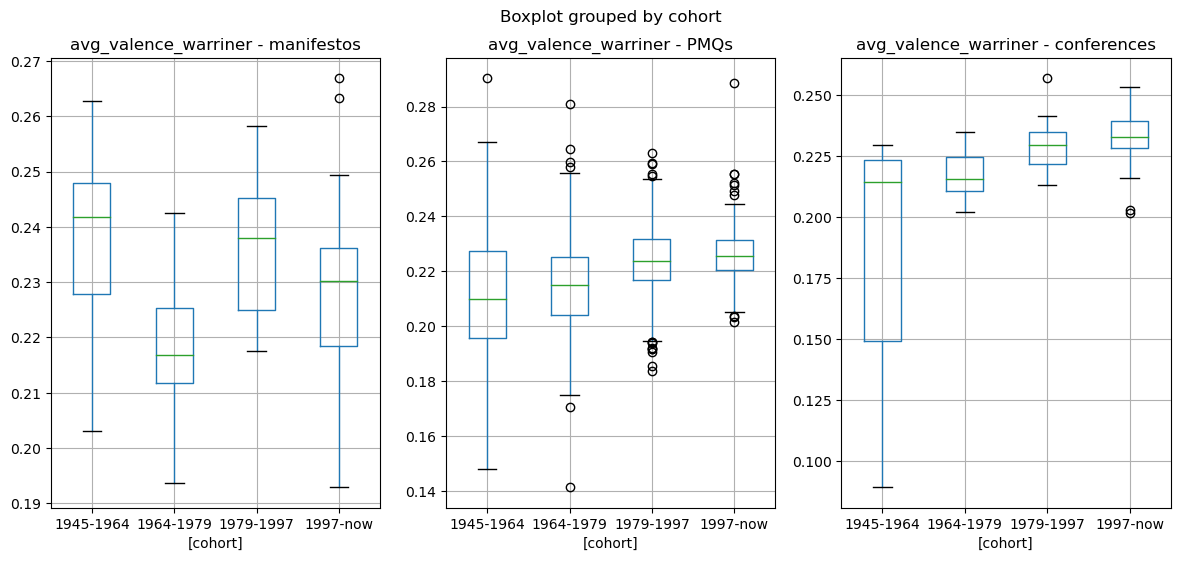


 Avg_Anger_Sentence_Score
	 Manifestos
1945-64 vs. 1964-79:	Change: + ; T-stat: -0.34; P-value: 0.7329
1964-79 vs. 1979-97:	Change: - ; T-stat: 1.04; P-value: 0.3088
1979-97 vs. 1997-now:	Change: + ; T-stat: -2.05*; P-value: 0.0464
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -0.45; P-value: 0.6537
1964-79 vs. 1979-97:	Change: - ; T-stat: 7.91***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -47.18***; P-value: 0.0000
	 Conferences
1945-64 vs. 1964-79:	Change: + ; T-stat: -2.49*; P-value: 0.0158
1964-79 vs. 1979-97:	Change: - ; T-stat: 2.14*; P-value: 0.0354
1979-97 vs. 1997-now:	Change: - ; T-stat: 3.39***; P-value: 0.0010


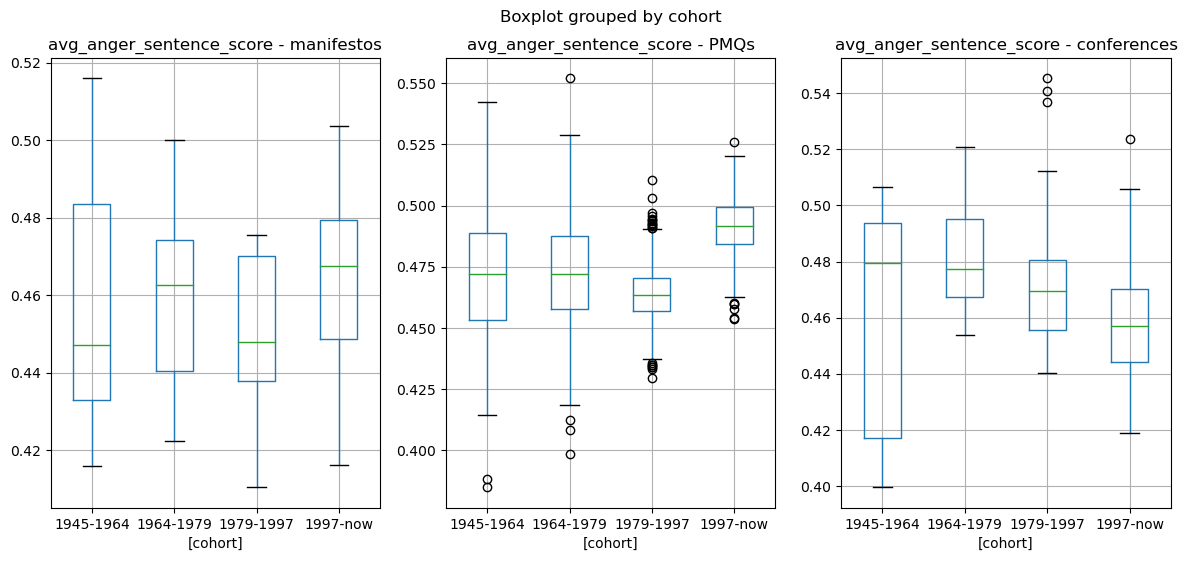


 Avg_Fear_Sentence_Score
	 Manifestos
1945-64 vs. 1964-79:	Change: - ; T-stat: 0.36; P-value: 0.7238
1964-79 vs. 1979-97:	Change: - ; T-stat: 1.90; P-value: 0.0678
1979-97 vs. 1997-now:	Change: + ; T-stat: -1.43; P-value: 0.1590
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -1.88; P-value: 0.0610
1964-79 vs. 1979-97:	Change: + ; T-stat: -2.22*; P-value: 0.0269
1979-97 vs. 1997-now:	Change: + ; T-stat: -43.09***; P-value: 0.0000
	 Conferences
1945-64 vs. 1964-79:	Change: + ; T-stat: -2.40*; P-value: 0.0195
1964-79 vs. 1979-97:	Change: - ; T-stat: 2.16*; P-value: 0.0338
1979-97 vs. 1997-now:	Change: - ; T-stat: 5.06***; P-value: 0.0000


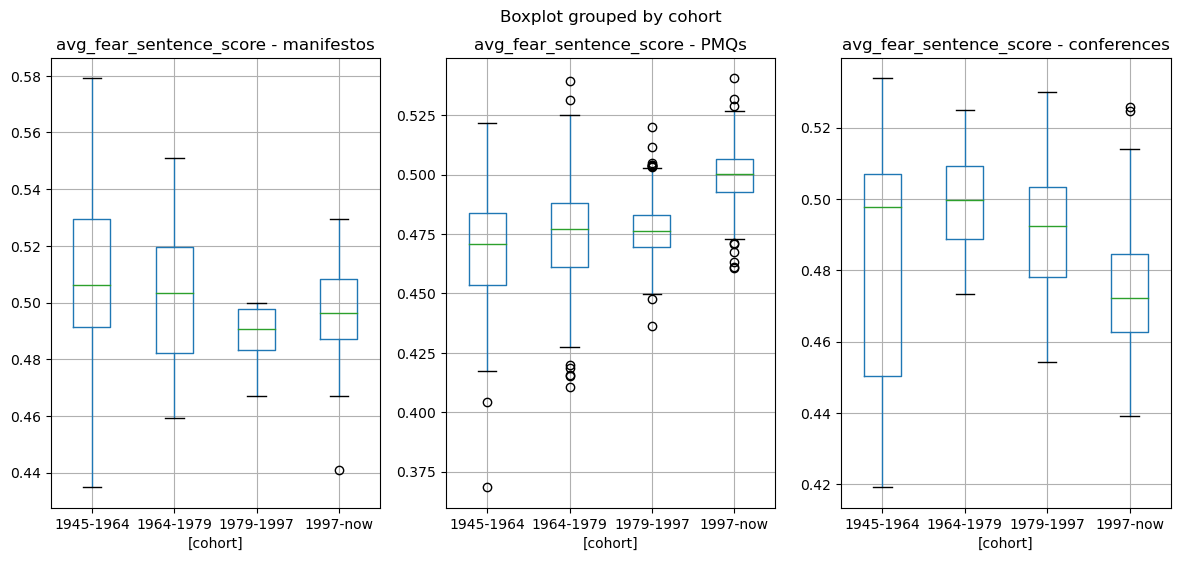


 Avg_Joy_Sentence_Score
	 Manifestos
1945-64 vs. 1964-79:	Change: + ; T-stat: -0.57; P-value: 0.5720
1964-79 vs. 1979-97:	Change: - ; T-stat: 3.35**; P-value: 0.0024
1979-97 vs. 1997-now:	Change: + ; T-stat: -1.88; P-value: 0.0667
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -1.08; P-value: 0.2833
1964-79 vs. 1979-97:	Change: - ; T-stat: 8.44***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -55.08***; P-value: 0.0000
	 Conferences
1945-64 vs. 1964-79:	Change: + ; T-stat: -3.20**; P-value: 0.0022
1964-79 vs. 1979-97:	Change: - ; T-stat: 2.88**; P-value: 0.0050
1979-97 vs. 1997-now:	Change: - ; T-stat: 4.00***; P-value: 0.0001


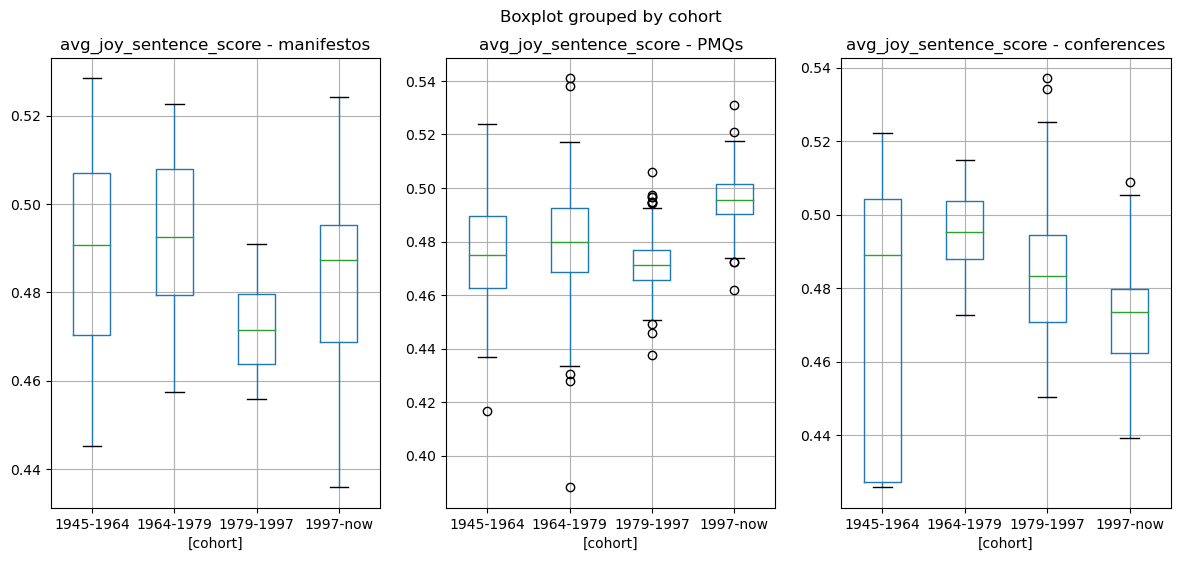


 Avg_Sadness_Sentence_Score
	 Manifestos
1945-64 vs. 1964-79:	Change: - ; T-stat: 0.38; P-value: 0.7093
1964-79 vs. 1979-97:	Change: - ; T-stat: 1.69; P-value: 0.1023
1979-97 vs. 1997-now:	Change: + ; T-stat: -0.64; P-value: 0.5270
	 PMQs
1945-64 vs. 1964-79:	Change: + ; T-stat: -0.86; P-value: 0.3916
1964-79 vs. 1979-97:	Change: - ; T-stat: 9.15***; P-value: 0.0000
1979-97 vs. 1997-now:	Change: + ; T-stat: -36.14***; P-value: 0.0000
	 Conferences
1945-64 vs. 1964-79:	Change: + ; T-stat: -1.05; P-value: 0.2960
1964-79 vs. 1979-97:	Change: - ; T-stat: 3.23**; P-value: 0.0018
1979-97 vs. 1997-now:	Change: - ; T-stat: 3.36**; P-value: 0.0010


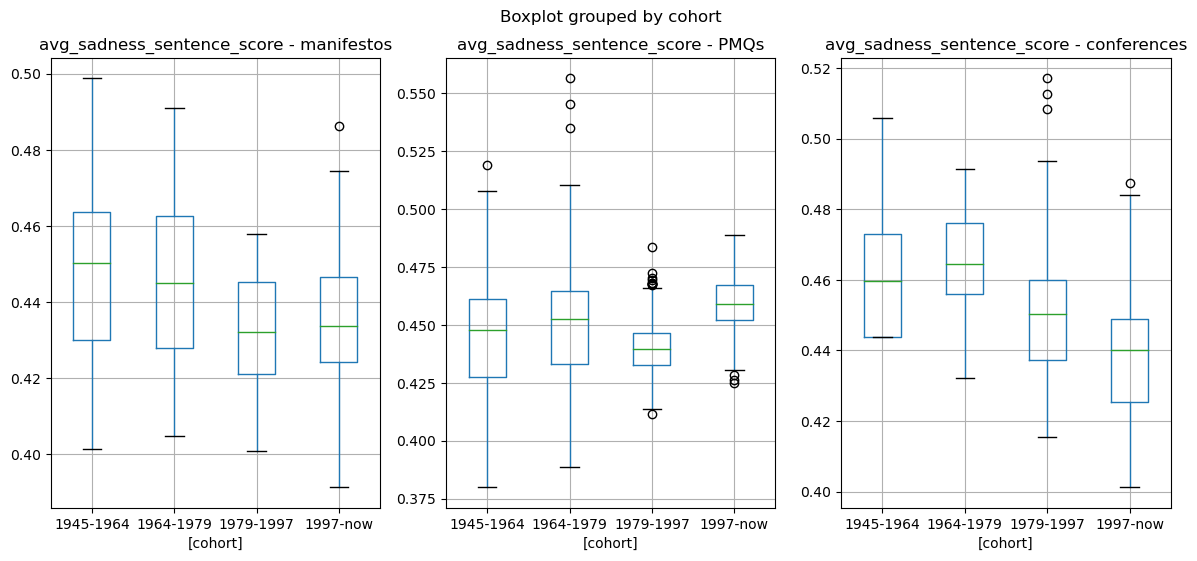

In [4]:
source_dict = {0:'Manifestos',
               1:'PMQs',
               2:'Conferences'}
cohort_dict = {'1945-1964':(pd.to_datetime('1945-01-01'),pd.to_datetime('1964-10-17')),
               '1964-1979':(pd.to_datetime('1964-10-17'),pd.to_datetime('1979-05-05')),
               '1979-1997':(pd.to_datetime('1979-05-05'),pd.to_datetime('1997-05-03')),
               '1997-now':(pd.to_datetime('1997-05-03'),pd.to_datetime('2022-06-14'))}
cohort_checker = lambda date: [cohort for cohort,date_range in cohort_dict.items() if date>=date_range[0] and date<date_range[1]][0]

sign = lambda num: '-' if num>0 else '+' # Flipped because a neg. t-score indicates mean(sample_2)>mean(sample_1)
stars = lambda num: '***' if num<0.001 else '**' if num<0.01 else '*' if num<0.05 else ''

for score in list(manifestos_scores[0].keys()):
    manifestos_with_scores = manifestos.copy()
    manifestos_with_scores[score] = [score_dict[score] for score_dict in manifestos_scores]
    manifestos_with_scores['cohort'] = manifestos_with_scores['year'].apply(cohort_checker)
    
    pmqs_with_scores = pmqs.copy()
    pmqs_with_scores[score] = [score_dict[score] for score_dict in pmqs_scores]
    pmqs_with_scores['cohort'] = pmqs_with_scores['date'].apply(cohort_checker)
    
    conferences_with_scores = conferences.copy()
    conferences_with_scores[score] = [score_dict[score] for score_dict in conferences_scores]
    conferences_with_scores['cohort'] = conferences_with_scores['year'].apply(cohort_checker)

    cohort_diffs = {0:dict(),1:dict(),2:dict()}
    for idx,df in enumerate([manifestos_with_scores,pmqs_with_scores,conferences_with_scores]):
        cohort_diffs[idx]['1945-64 vs. 1964-79'] = stats.ttest_ind(df[df['cohort']=='1945-1964'][score].to_numpy(),
                                                                   df[df['cohort']=='1964-1979'][score].to_numpy())
        cohort_diffs[idx]['1964-79 vs. 1979-97'] = stats.ttest_ind(df[df['cohort']=='1964-1979'][score].to_numpy(),
                                                                   df[df['cohort']=='1979-1997'][score].to_numpy())
        cohort_diffs[idx]['1979-97 vs. 1997-now'] = stats.ttest_ind(df[df['cohort']=='1979-1997'][score].to_numpy(),
                                                                    df[df['cohort']=='1997-now'][score].to_numpy())
    
    print("\n",score.title())
    for source,cohort_diff in cohort_diffs.items():
        print("\t",source_dict[source])
        for name,diff in cohort_diff.items():
            print("{}:\tChange: {} ; T-stat: {:.2f}{}; P-value: {:.4f}".format(name, sign(diff.statistic), diff.statistic, stars(diff.pvalue), diff.pvalue))
        
    fig,axs = plt.subplots(1,3, figsize=(14,6))
    manifestos_with_scores.boxplot(by='cohort', ax=axs[0])
    axs[0].set_title(score+' - manifestos')
    pmqs_with_scores.boxplot(by='cohort', ax=axs[1])
    axs[1].set_title(score+' - PMQs')
    conferences_with_scores.boxplot(by='cohort', ax=axs[2])
    axs[2].set_title(score+' - conferences')
    plt.show()
      

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:07<00:00, 293.94it/s]


<Figure size 640x480 with 0 Axes>

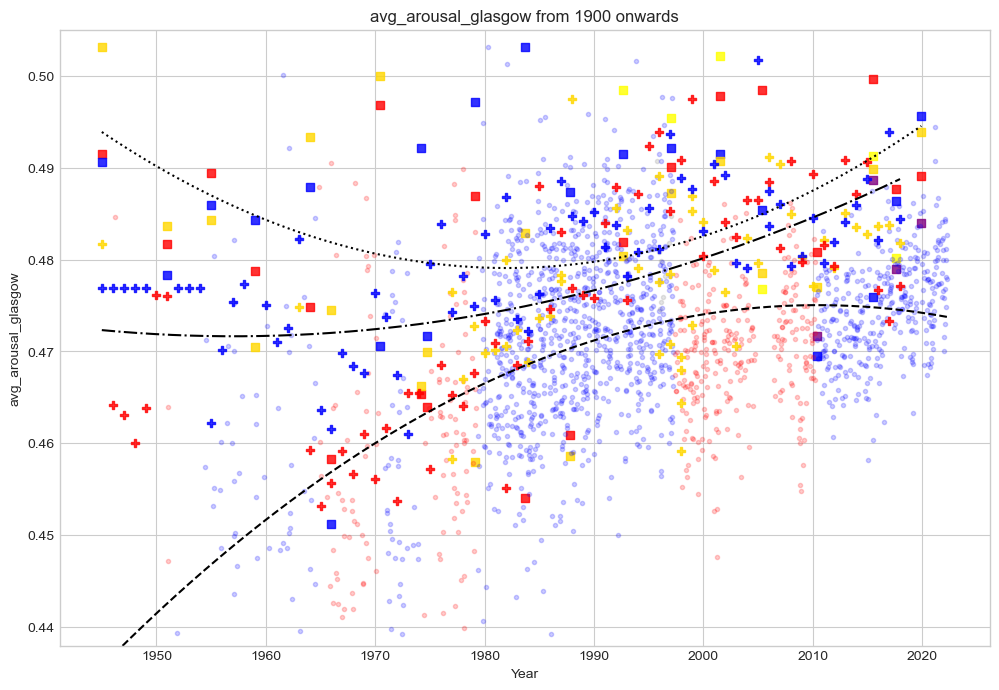

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:06<00:00, 317.34it/s]


<Figure size 640x480 with 0 Axes>

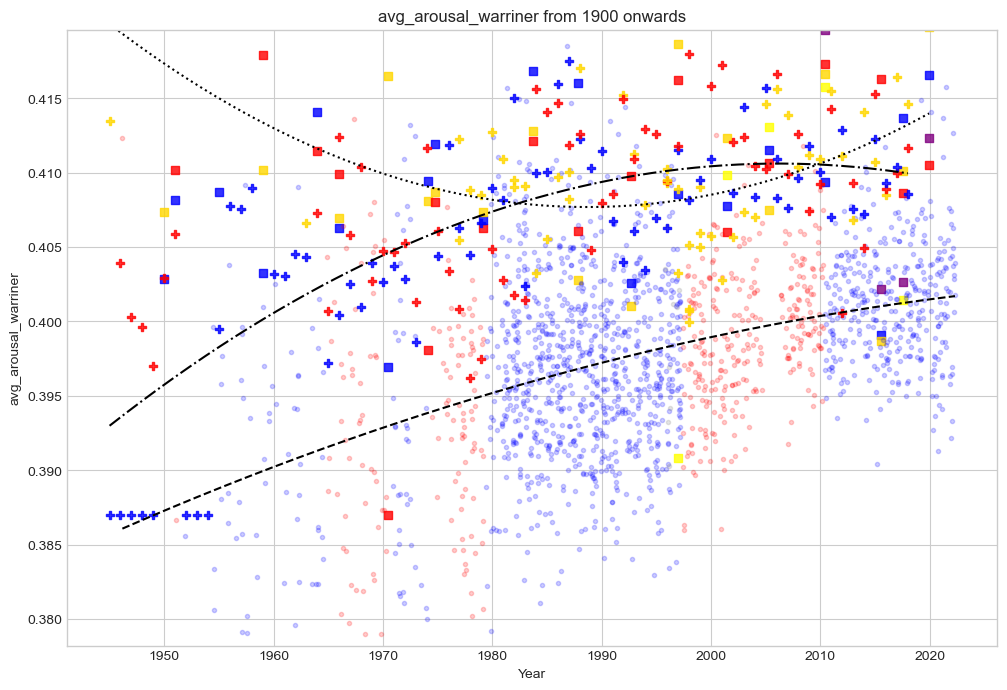

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:09<00:00, 219.67it/s]


<Figure size 640x480 with 0 Axes>

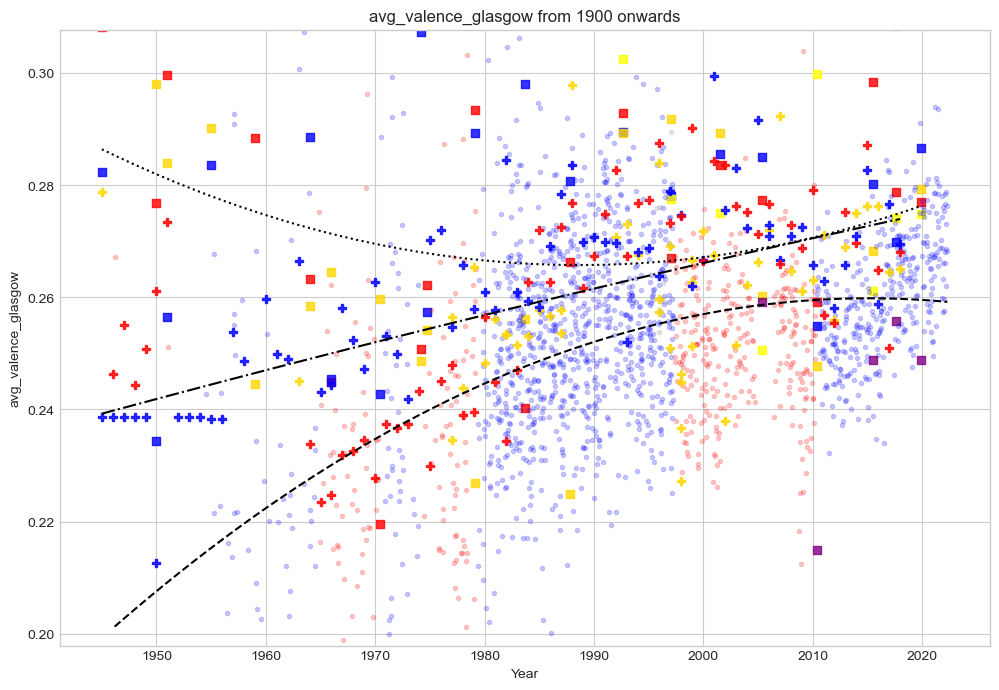

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:08<00:00, 244.30it/s]


<Figure size 640x480 with 0 Axes>

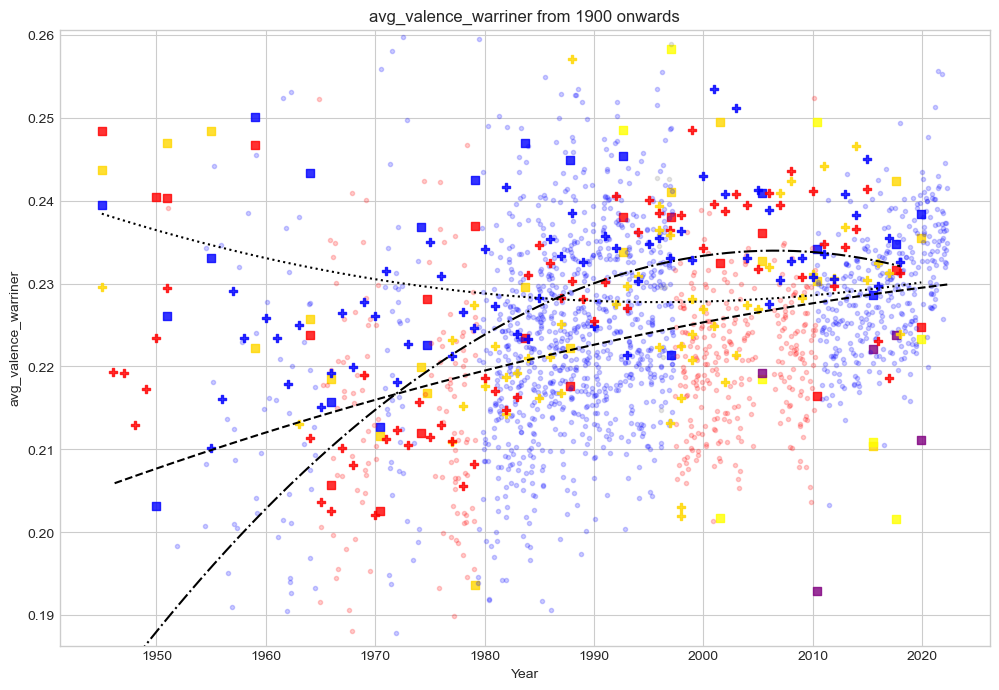

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:09<00:00, 228.96it/s]


<Figure size 640x480 with 0 Axes>

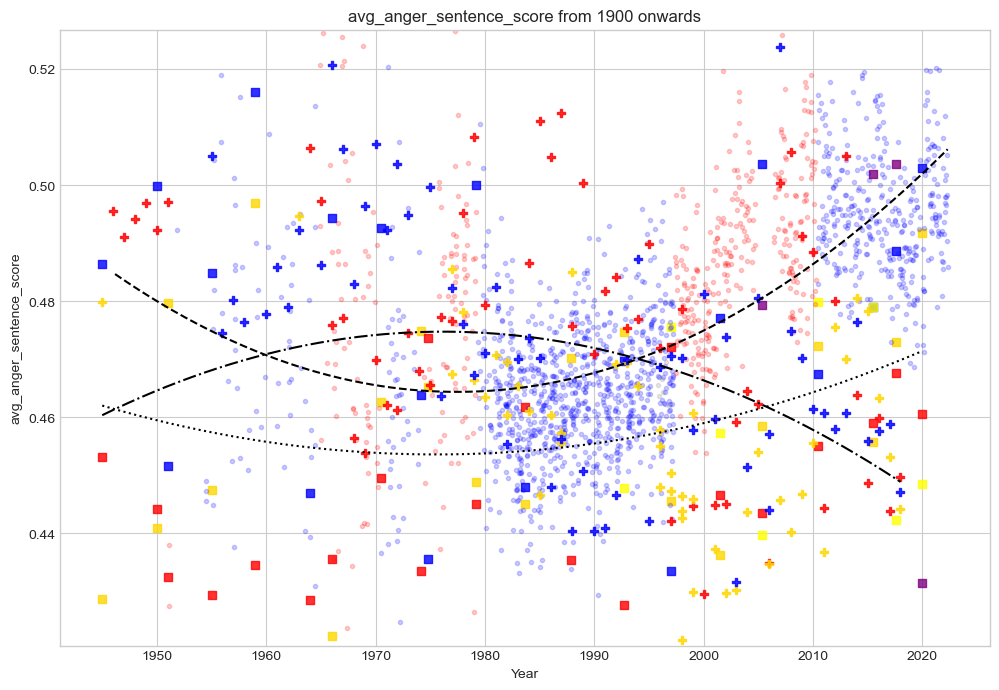

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:08<00:00, 248.35it/s]


<Figure size 640x480 with 0 Axes>

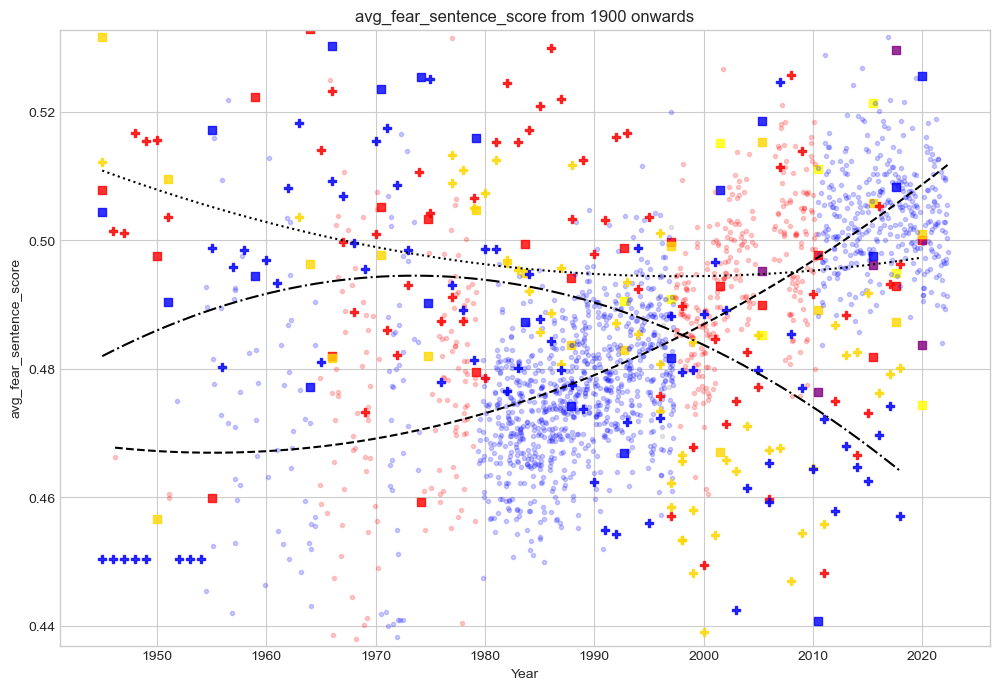

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:08<00:00, 239.86it/s]


<Figure size 640x480 with 0 Axes>

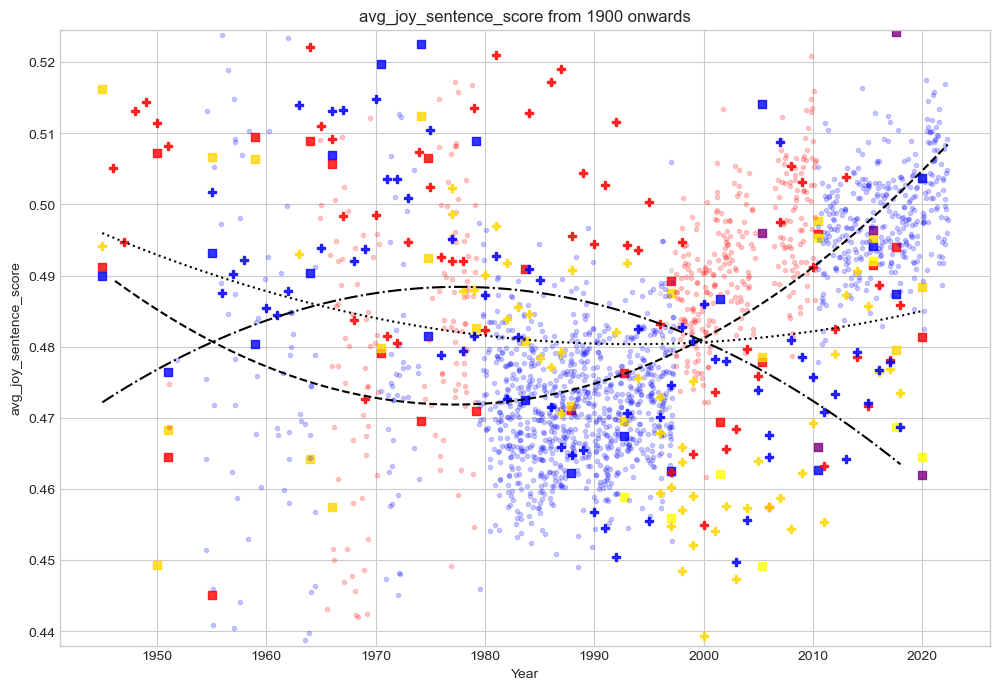

Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:08<00:00, 234.97it/s]


<Figure size 640x480 with 0 Axes>

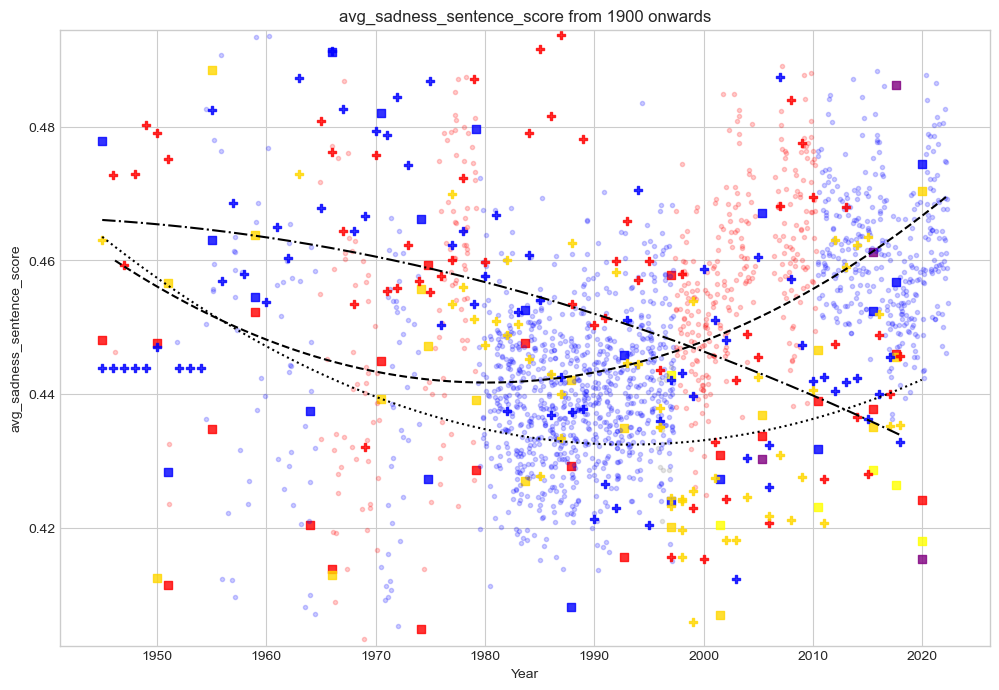

In [8]:
party_dict = {'Labour':'LAB',
              'Conservative':'CON',
              'Liberal':'LIB',
              'SDP-Liberal Alliance':'LIB',
              'Liberal Democrat':'LIB',
              np.nan:'NAN'}

for s_idx,scoring_var in enumerate(manifestos_scores[0].keys()):
    plt.clf()
    manifestos_df = pd.DataFrame({'score':[x[s_idx] for x in manifestos_vecs],
                                  'type':['manifesto']*len(manifestos_vecs),
                                  'year':manifestos.drop(manifestos_nans, axis=0).year,
                                  'party':manifestos.drop(manifestos_nans, axis=0).party})
    pmqs_df = pd.DataFrame({'score':[x[s_idx] for x in pmqs_vecs],
                           'type':['PMQs']*len(pmqs_vecs),
                           'year':pmqs.drop(pmqs_nans, axis=0).date,
                           'party':pmqs.drop(pmqs_nans, axis=0).answerer_party.apply(lambda party: party_dict[str(party)] if str(party) in party_dict.keys() else 'NAN')})
    conferences_df = pd.DataFrame({'score':[x[s_idx] for x in conferences_vecs],
                                   'type':['conference']*len(conferences_vecs),
                                   'year':conferences.drop(conferences_nans, axis=0).year,
                                   'party':conferences.drop(conferences_nans, axis=0).party.apply(lambda party: party_dict[party])})
    var_df = pd.DataFrame({'score':[],'type':[],'year':[],'party':[]})
    var_df = var_df.append(manifestos_df)
    var_df = var_df.append(pmqs_df)
    var_df = var_df.append(conferences_df)

    col_dict = {'LAB':'red','CON':'blue','LIB':'gold','SNP':'yellow','UKIP':'purple','BRX':'purple','NAN':'grey'}
    marker_dict = {'manifesto':'s','PMQs':'.','conference':'P'}
    alpha_dict = {'manifesto':0.8,'PMQs':0.2,'conference':0.8}

    plt.style.use('seaborn-whitegrid')
    fig,ax = plt.subplots(1, figsize=(12,8))
    var_df.progress_apply(lambda row: ax.scatter(row.year, row.score,
                                                              color=col_dict[row.party],
                                                              marker=marker_dict[row.type],
                                                              alpha=alpha_dict[row.type]),
                                       axis=1)

    # Plot line of best fit for manifestos
    deg = 2
    x = np.array([date for date in manifestos.drop(manifestos_nans, axis=0).year])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in manifestos_scores])
    coefs = np.polyfit(native_x, y, deg=deg)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
    yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
    ax.plot(pd.to_datetime(xseq), yseq, ':', color='black')
    # ...PMQs
    x = np.array([date for date in pmqs.drop(pmqs_nans, axis=0).date])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in pmqs_scores])
    coefs = np.polyfit(native_x, y, deg=deg)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
    yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
    ax.plot(pd.to_datetime(xseq), yseq, '--', color='black')
    # ...and conference speeches
    x = np.array([date for date in conferences.drop(conferences_nans, axis=0).year])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in conferences_scores])
    coefs = np.polyfit(native_x, y, deg=deg)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
    yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
    ax.plot(pd.to_datetime(xseq), yseq, '-.', color='black')
    ax.set_ylim(max(var_df.score.mean()-(2.6*var_df.score.std()), var_df.score.min()),
                min(var_df.score.mean()+(2.6*var_df.score.std()), var_df.score.max()))
    ax.set_xlabel("Year")
    ax.set_ylabel(scoring_var)
    ax.set_title(scoring_var+" from 1900 onwards")
    plt.show()

C:\Users\natha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\natha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


avg_arousal_glasgow: 2.9279
avg_arousal_warriner: 2.4770
avg_valence_glasgow: 1.5711
avg_valence_warriner: 1.3884
avg_anger_sentence_score: 2.9437
avg_fear_sentence_score: 3.0125
avg_joy_sentence_score: 2.9900
avg_sadness_sentence_score: 2.7860


Cleaning: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 2065/2065 [00:06<00:00, 307.33it/s]


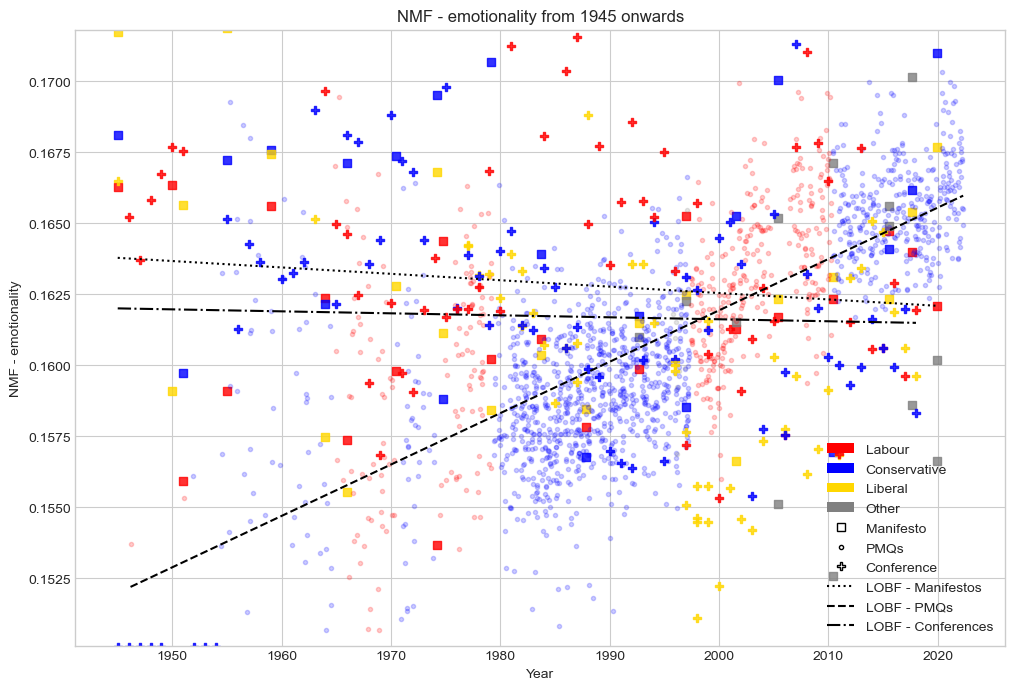

In [6]:
from sklearn.decomposition import NMF

X = manifestos_vecs+pmqs_vecs+conferences_vecs

nmf = NMF(n_components=1)
nmf.fit(X)

for name,loading in zip(manifestos_scores[0].keys(), nmf.components_[0]):
    print("{}: {:.4f}".format(name,loading))

manifestos_df = pd.DataFrame({'score':nmf.transform(manifestos_vecs).squeeze(),
                              'type':['manifesto']*len(manifestos_vecs),
                              'year':manifestos.drop(manifestos_nans, axis=0).year,
                              'party':manifestos.drop(manifestos_nans, axis=0).party})
pmqs_df = pd.DataFrame({'score':nmf.transform(pmqs_vecs).squeeze(),
                        'type':['PMQs']*len(pmqs_vecs),
                        'year':pmqs.drop(pmqs_nans, axis=0).date,
                        'party':pmqs.drop(pmqs_nans, axis=0).answerer_party.apply(lambda party: party_dict[str(party)] if str(party) in party_dict.keys() else 'NAN')})
conferences_df = pd.DataFrame({'score':nmf.transform(conferences_vecs).squeeze(),
                               'type':['conference']*len(conferences_vecs),
                               'year':conferences.drop(conferences_nans, axis=0).year,
                               'party':conferences.drop(conferences_nans, axis=0).party.apply(lambda party: party_dict[party])})
var_df = pd.DataFrame({'score':[],'type':[],'year':[],'party':[]})
var_df = var_df.append(manifestos_df)
var_df = var_df.append(pmqs_df)
var_df = var_df.append(conferences_df)
col_dict = {'LAB':'red','CON':'blue','LIB':'gold','SNP':'grey','UKIP':'grey','BRX':'grey','NAN':'grey'}
legend_col_dict = {'LAB':'red','CON':'blue','LIB':'gold','OTHER':'grey'}
marker_dict = {'manifesto':'s','PMQs':'.','conference':'P'}
alpha_dict = {'manifesto':0.8,'PMQs':0.2,'conference':0.8}

plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(1, figsize=(12,8))
        
var_df.progress_apply(lambda row: ax.scatter(row.year, row.score,
                                                          color=col_dict[row.party],
                                                          marker=marker_dict[row.type],
                                                          alpha=alpha_dict[row.type]),
                                   axis=1)

# Plot line of best fit for manifestos
deg = 1
x = np.array([date for date in manifestos.drop(manifestos_nans, axis=0).year])
native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
y = np.array(manifestos_df.score)
coefs = np.polyfit(native_x, y, deg=deg)
xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
ax.plot(pd.to_datetime(xseq), yseq, ':', color='black')

# ...PMQs
x = np.array([date for date in pmqs.drop(pmqs_nans, axis=0).date])
native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
y = np.array(pmqs_df.score)
coefs = np.polyfit(native_x, y, deg=deg)
xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
ax.plot(pd.to_datetime(xseq), yseq, '--', color='black')

# ...and conference speeches
x = np.array([date for date in conferences.drop(conferences_nans, axis=0).year])
native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
y = np.array(conferences_df.score)
coefs = np.polyfit(native_x, y, deg=deg)
xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
XX = np.vstack([xseq**(deg-i) for i in range(deg+1)]).T # rows 1, x, x**2, ...
yseq = np.dot(XX, coefs)  # matrix multiplication by coefs calculates the polynomial values
ax.plot(pd.to_datetime(xseq), yseq, '-.', color='black')

ax.set_ylim(max(var_df.score.mean()-(2.6*var_df.score.std()), var_df.score.min()),
            min(var_df.score.mean()+(2.6*var_df.score.std()), var_df.score.max()))
ax.set_xlabel("Year")
ax.set_ylabel("NMF - emotionality")
ax.set_title("NMF - emotionality from 1945 onwards")

colour_labels = ["Labour","Conservative","Liberal","Other"]
marker_labels = ["Manifesto","PMQs","Conference"]
line_labels = ["LOBF - Manifestos","LOBF - PMQs","LOBF - Conferences"]

colour_artists = [mpatches.Patch(facecolor=col) for lab,col in legend_col_dict.items()]
marker_artists = [plt.plot([], [], marker, markerfacecolor='w', markeredgecolor='k')[0] for lab,marker in marker_dict.items()]
line_artists = [mlines.Line2D([],[], linestyle=line_type, color='black') for line_type in [':','--','-.']]

ax.legend(colour_artists+marker_artists+line_artists,
          colour_labels+marker_labels+line_labels)

plt.savefig('../figs/nmf/emotionality.png')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm

current_day = datetime.strftime(datetime.now(), format="%Y-%m-%d")
pm_list = [['Neville Chamberlain',('1937-05-29','1940-05-09')],
               ['Winston Churchill (1)',('1940-05-10','1945-07-26')],
               ['Clement Attlee',('1945-07-27','1951-10-26')],
               ['Winston Churchill (2)',('1951-10-27','1955-04-05')],
               ['Anthony Eden',('1955-04-06','1957-01-09')],
               ['Harold Macmillan',('1957-01-10','1963-10-18')],
               ['Alec Douglas-Home',('1963-10-19','1964-10-16')],
               ['Harold Wilson (1)',('1964-10-17','1970-06-19')],
               ['Edward Heath',('1970-06-20','1974-03-04')],
               ['Harold Wilson (2)',('1974-03-05','1976-04-05')],
               ['James Callaghan',('1976-04-06','1979-05-04')],               
               ['Margaret Thatcher',('1979-05-05','1990-11-28')],
               ['John Major',('1990-11-29','1997-05-02')],
               ['Tony Blair',('1997-05-03','2007-06-27')],
               ['Gordon Brown',('2007-06-28','2010-05-11')],
               ['David Cameron',('2010-05-12','2016-07-13')],
               ['Theresa May',('2016-07-14','2019-07-24')],
               ['Boris Johnson',('2019-07-25',current_day)]]
pmqs_for_boxplot = pd.read_csv('../hansard-pmqs/hansard_pmqs.csv')
pmqs_for_boxplot.date = pd.to_datetime(pmqs_for_boxplot.date)
pmqs_for_boxplot = pmqs_for_boxplot[pmqs_for_boxplot.date>='1937-05-29']
pmqs_for_boxplot = pd.DataFrame({'date':pmqs_for_boxplot.groupby(by='date').answer_text.aggregate(lambda x: ''.join(x)).index,
                     'answer_text':pmqs_for_boxplot.groupby(by='date').answer_text.aggregate(lambda x: ''.join(x)),
                     'answerer_party':pmqs_for_boxplot.groupby(by='date').answerer_party.aggregate(lambda x: x.mode()),
                     'answerer_name':pmqs_for_boxplot.groupby(by='date').answerer_name.aggregate(lambda x: x.mode())})
pmqs_for_boxplot['answerer_name'] = pmqs_for_boxplot.date.apply(lambda date: [pm for pm,(start_date,end_date) in pm_list if date>=pd.to_datetime(start_date) and date<=pd.to_datetime(end_date)][0])
pmqs_for_boxplot['score'] = [x for x in pmqs_scores]
pmqs_for_boxplot = pmqs_for_boxplot[pmqs_for_boxplot.answerer_party.apply(lambda party: party in ['Conservative','Labour'])]

In [ ]:
for scoring_var in list(pmqs_for_boxplot.score[1].keys()):
    fig,ax = plt.subplots(1, figsize=(26,14))
    ax.boxplot([pmqs_for_boxplot[pmqs_for_boxplot.answerer_name==pm[0]].score.apply(lambda entry: entry[scoring_var]).to_numpy() for pm in pm_list],
               labels=[pm[0] for pm in pm_list])
    ax.set_title(scoring_var+" for Prime Ministers since 1900")
    plt.show()

In [ ]:
import pwlf

party_dict = {'Labour':'LAB',
              'Conservative':'CON',
              'Liberal':'LIB',
              'SDP-Liberal Alliance':'LIB',
              'Liberal Democrat':'LIB',
              np.nan:'NAN'}



for s_idx,scoring_var in enumerate(manifestos_scores[0].keys()):

    plt.clf()
    manifestos_df = pd.DataFrame({'score':[x[s_idx] for x in manifestos_vecs],
                                  'type':['manifesto']*len(manifestos_vecs),
                                  'year':manifestos.drop(manifestos_nans, axis=0).year,
                                  'party':manifestos.drop(manifestos_nans, axis=0).party})
    pmqs_df = pd.DataFrame({'score':[x[s_idx] for x in pmqs_vecs],
                           'type':['PMQs']*len(pmqs_vecs),
                           'year':pmqs.drop(pmqs_nans, axis=0).date,
                           'party':pmqs.drop(pmqs_nans, axis=0).answerer_party.apply(lambda party: party_dict[str(party)] if str(party) in party_dict.keys() else 'NAN')})
    conferences_df = pd.DataFrame({'score':[x[s_idx] for x in conferences_vecs],
                                   'type':['conference']*len(conferences_vecs),
                                   'year':conferences.drop(conferences_nans, axis=0).year,
                                   'party':conferences.drop(conferences_nans, axis=0).party.apply(lambda party: party_dict[party])})
    var_df = pd.DataFrame({'score':[],'type':[],'year':[],'party':[]})
    var_df = var_df.append(manifestos_df)
    var_df = var_df.append(pmqs_df)
    var_df = var_df.append(conferences_df)

    col_dict = {'LAB':'red','CON':'blue','LIB':'gold','SNP':'yellow','UKIP':'purple','BRX':'purple','NAN':'grey'}
    marker_dict = {'manifesto':'s','PMQs':'.','conference':'P'}
    alpha_dict = {'manifesto':0.8,'PMQs':0.2,'conference':0.8}

    plt.style.use('seaborn-whitegrid')
    fig,ax = plt.subplots(1, figsize=(12,8))
    var_df.progress_apply(lambda row: ax.scatter(row.year, row.score,
                                                              color=col_dict[row.party],
                                                              marker=marker_dict[row.type],
                                                              alpha=alpha_dict[row.type]),
                                       axis=1)

    # Plot line of best fit for manifestos
    segments = 4
    x = np.array([date for date in manifestos.drop(manifestos_nans, axis=0).year])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in manifestos_scores])
    mani_pwlf = pwlf.PiecewiseLinFit(native_x, y, degree=0)
    mani_pwlf.fit(segments)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    yseq = mani_pwlf.predict(xseq)
    ax.plot(pd.to_datetime(xseq), yseq, ':', color='black')
    # ...PMQs
    x = np.array([date for date in pmqs.drop(pmqs_nans, axis=0).date])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in pmqs_scores])
    pmqs_pwlf = pwlf.PiecewiseLinFit(native_x, y, degree=0)
    pmqs_pwlf.fit(segments)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    yseq = pmqs_pwlf.predict(xseq)
    ax.plot(pd.to_datetime(xseq), yseq, '--', color='black')
    # ...and conference speeches
    x = np.array([date for date in conferences.drop(conferences_nans, axis=0).year])
    native_x = [int(xi.timestamp() * 10**9) for xi in x] # convert x to native timestamp
    y = np.array([score_dict[scoring_var] for score_dict in conferences_scores])
    conf_pwlf = pwlf.PiecewiseLinFit(native_x, y, degree=0)
    conf_pwlf.fit(segments)
    xseq = np.linspace(min(native_x)-1, max(native_x)+1, num=500)
    yseq = conf_pwlf.predict(xseq)
    ax.plot(pd.to_datetime(xseq), yseq, '-.', color='black')
    ax.set_xlabel("Year")
    ax.set_ylabel(scoring_var)
    ax.set_title(scoring_var+" from 1900 onwards")
    plt.show()